# Udacity Project 7 - Wrangle and Analyze Data - by Kevin Ivan Kosacoff

Let's start by importing the necessary libraries for this project.

In [3]:
import tweepy
import pandas as pd
import requests
import json
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Gather

Let's 1st read the content of the first file provided, the Twitter Enhanced Archive. This was downloaded from Udacity's website and uploaded to this notebook manually. Let's then inspect the new dataframe to see if it was gathered correctly, we will analyze it in further detail in the Assessment part.

In [4]:
tw_arch_enh = pd.read_csv('twitter-archive-enhanced.csv')
tw_arch_enh.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Let's now move on to the second data frame we need, which is also provided by Udacity, but this time we need to download it programatically with the Requests library.

In [5]:
img_pred_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(img_pred_url)

In [6]:
with open ('image_predictions.tsv', mode='wb') as file:
    file.write(r.content)

In [7]:
img_pred = pd.read_csv('image_predictions.tsv', sep='\t')
img_pred.head() 

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


We can see from the above dataframe that the data was gathered correctly.
Let's now move on to gather Twitter data directly via the API and tweepy module. I first iterate over all of the tweet IDs and try to get from Twitter its favs and RT count. I've included the wait parameters so that we wouldn't be penalized by Twitter for querying too many tweets in a row. Try and except are used to prevent the loop from breakin if its not able to find the tweet ID. If its not able to found it it will print a message and add the ID to a list to keep track of them. If not, each tweet information is added to a dictionary.

In [8]:
json_data = {}
json_data['tweets'] = []
bad_tweets = []

for tweet_id in tw_arch_enh.tweet_id:
    try:
        tweet = api.get_status(str(tweet_id), tweet_mode='extended',
                               wait_on_rate_limit = True, wait_on_rate_limit_notify = True)
        rt_count = tweet.retweet_count
        fav_count = tweet.favorite_count

        json_data['tweets'].append({'tweet_id' : str(tweet_id),
                        'rt_count' : int(rt_count),
                        'fav_count' : int(fav_count)})
    except:
        bad_tweets.append(str(tweet_id))
    

The above code took like 15 minutes to run. Once we had all that information, we dumped all that we gathered into a txt file to prevent having to run the above code each time we wanted to gather that information. 

In [ ]:
with open('tweet_json.txt', 'w') as outfile:  
    json.dump(json_data, outfile)

In [9]:
len(bad_tweets)

17

Once we create the txt file we then have to open it and create a dataframe with it so we can do analysis with it. Below we do that.

In [5]:
df_list=[]
with open('tweet_json.txt') as json_file:  
    data = json.load(json_file)
    for p in data['tweets']:
        df_list.append({'tweet_id': str(p['tweet_id']),
                        'rt_count': p['rt_count'],
                        'fav_count': p['fav_count']})

In [6]:
tweets_data = pd.DataFrame(df_list, columns = ['tweet_id', 'rt_count', 'fav_count'])
tweets_data.head()

,tweet_id,rt_count,fav_count
0,892420643555336193,8249,37825
1,892177421306343426,6093,32500
2,891815181378084864,4034,24461
3,891689557279858688,8402,41170
4,891327558926688256,9101,39350


## Assess

In [18]:
tw_arch_enh

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [34]:
tw_arch_enh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [35]:
tw_arch_enh.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [59]:
img_pred.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

### Issues
#### Quality

##### `tw_arch_enh` 

- Tweet 666287406224695296 has the rating information wrong, should be 9/10, also the name is wrong.

- Tweets that are replies are not useful for the analysis.

- Columns in_reply_to_status_id, in_reply_to_user_id, source, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp don't add any value to our analysis.

- Timestamp should be in date format and not string

- Some dog names such as [a, an, quite, such, the, unacceptable] are wrong.

- Tweet 810984652412424192 has no rating information.

- Tweets that are retweets are not useful for the analysis.

- tweet_id column should be string format for all dataframes

- Add a ratio column.

##### `img_pred`

- Tweets that are not from dogs are not useful for the analysis.

#### Tidyness
- Data is spread across multiple tables.

- doggo, floofer, pupper, and puppo columns are values and not variable names.

## Clean

We first start by copying dataframes in new ones, to prevent overriding the original data, and letting us go back to the beggining in case we do anything wrong

In [7]:
tw_arch_enh_clean = tw_arch_enh.copy()
img_pred_clean = img_pred.copy()
tweets_data_clean = tweets_data.copy()

#### `tw_arch_enh`:  Tweet 666287406224695296 is wrong

##### Define
 > Fix rating information for the tweet and change the name.

##### Code

In [8]:
mask = tw_arch_enh_clean['tweet_id'] == 666287406224695296
tw_arch_enh_clean.loc[mask, 'rating_numerator'] = int(9)
tw_arch_enh_clean.loc[mask, 'rating_denominator'] = int(10)
tw_arch_enh_clean.loc[mask, 'name'] = None

##### Test

In [111]:
tw_arch_enh_clean[tw_arch_enh_clean['tweet_id'] == 666287406224695296]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,9,10,None,None,None,None,None


#### `tw_arch_enh`:  Tweets that are replies and retweets are not useful for the analysis.

##### Define
 > Drop rows that have reply ID
 
 > Drop rows that have RT ID

##### Code

In [9]:
tw_arch_enh_clean = tw_arch_enh_clean[tw_arch_enh_clean.in_reply_to_status_id.isna()]
tw_arch_enh_clean = tw_arch_enh_clean[tw_arch_enh_clean.retweeted_status_id.isna()]

##### Test

In [113]:
tw_arch_enh_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2096 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

#### `tw_arch_enh`:  Columns in_reply_to_status_id, in_reply_to_user_id, source, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp don't add any value to our analysis.

##### Define
> Drop columns in_reply_to_status_id, in_reply_to_user_id, source, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

##### Code

In [10]:
tw_arch_enh_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
                       'retweeted_status_timestamp', 'source'], inplace=True, axis=1)

##### Test

In [107]:
tw_arch_enh_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2096 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(8)
memory usage: 196.6+ KB


#### `tw_arch_enh`:  Some dog names such as [a, an, quite, such] are wrong.

##### Define
> Replace those names with None

##### Code

In [11]:
wrong_names = ['a', 'an', 'quite', 'such', 'the', 'unacceptable']
mask = tw_arch_enh_clean['name'].isin(wrong_names)
tw_arch_enh_clean.loc[mask, 'name'] = None

##### Test

In [13]:
tw_arch_enh_clean['name'].value_counts()

None        745
Charlie      12
Cooper       11
Lucy         11
Oliver       11
Penny        10
Tucker       10
Lola         10
Winston       9
Bo            9
Sadie         8
Bailey        7
Buddy         7
Toby          7
Daisy         7
Oscar         6
Jack          6
Milo          6
Bella         6
Scout         6
Leo           6
Koda          6
Jax           6
Rusty         6
Stanley       6
Dave          6
Louis         5
Larry         5
Sunny         5
Finn          5
           ... 
Sailor        1
Sandra        1
Farfle        1
Eazy          1
Monster       1
Roscoe        1
Raphael       1
Rufio         1
Bloo          1
Aubie         1
Dot           1
Kanu          1
Grady         1
Snicku        1
Patch         1
Lambeau       1
Clyde         1
Rupert        1
Snickers      1
Stuart        1
Karma         1
Craig         1
Lulu          1
Barney        1
Eevee         1
Shelby        1
Jeffri        1
Ziva          1
Daniel        1
Harnold       1
Name: name, Length: 951,

#### `tw_arch_enh`: Timestamp should be in date format and not string

##### Define
> Format timestamp column in date format for better analysis

##### Code

In [12]:
tw_arch_enh_clean['timestamp'] = tw_arch_enh_clean['timestamp'].str.slice(0,-6, 1)
tw_arch_enh_clean['timestamp'] = pd.to_datetime(tw_arch_enh_clean['timestamp'])

##### Test

In [38]:
tw_arch_enh_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2032 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 196.6+ KB


#### `tw_arch_enh`: Tweet 810984652412424192 has no real rating information.

##### Define
> Drop row of tweet 810984652412424192.

##### Code

In [13]:
mask = tw_arch_enh_clean['tweet_id'] != 810984652412424192
tw_arch_enh_clean = tw_arch_enh_clean[mask]

##### Test

In [23]:
tw_arch_enh_clean[tw_arch_enh_clean['tweet_id'] == 810984652412424192]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### `img_pred`: Tweets that are not from dogs are not useful for the analysis.

##### Define
> Drop rows that are not from dogs with a probability of 0.7 or more

##### Code

In [14]:
mask = (img_pred_clean['p1_dog'] == False) & (img_pred_clean['p1_conf'] >= 0.7)
img_pred_clean = img_pred_clean[mask==False]

##### Test

In [169]:
img_pred_clean['p1_dog'].value_counts()

True     1532
False     355
Name: p1_dog, dtype: int64

#### `tw_arch_enh`: tweet_id column should be string format for all df

##### Define

> Change data type of tweet_id column

##### Code

In [15]:
tw_arch_enh_clean['tweet_id'] = tw_arch_enh_clean['tweet_id'].astype(str)
img_pred_clean['tweet_id'] = img_pred_clean['tweet_id'].astype(str)

In [98]:
tw_arch_enh_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2107 entries, 0 to 7154
Data columns (total 8 columns):
tweet_id              2107 non-null object
timestamp             2107 non-null datetime64[ns]
text                  2107 non-null object
expanded_urls         2104 non-null object
rating_numerator      2107 non-null int64
rating_denominator    2107 non-null int64
name                  2042 non-null object
stage                 2107 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 148.1+ KB


In [99]:
img_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1887 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    1887 non-null object
jpg_url     1887 non-null object
img_num     1887 non-null int64
p1          1887 non-null object
p1_conf     1887 non-null float64
p1_dog      1887 non-null bool
p2          1887 non-null object
p2_conf     1887 non-null float64
p2_dog      1887 non-null bool
p3          1887 non-null object
p3_conf     1887 non-null float64
p3_dog      1887 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 153.0+ KB


#### `tw_arch_enh`: doggo, floofer, pupper, and puppo columns are values and not variable names.

##### Define
> Melt 4 columns into one named stage

##### Code

1st I melt all the columns and then I filter them by all that have at least one stage value

In [16]:
has_stage = pd.melt(tw_arch_enh_clean, id_vars=['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
                                    'rating_denominator', 'name'],
                            var_name='dummy', value_name='stage')
has_stage=has_stage[has_stage['stage']!= 'None']

Then I filter again the original df but this time for all rows that do not have any value and melt them.

In [17]:
mask = (tw_arch_enh_clean['doggo'] == 'None') & (tw_arch_enh_clean['floofer'] == 'None') & (tw_arch_enh_clean['pupper'] == 'None') & (tw_arch_enh_clean['puppo'] == 'None')
not_stage = pd.melt(tw_arch_enh_clean.loc[mask,], id_vars=['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
                                    'rating_denominator', 'name'],
                            var_name='dummy', value_name='stage')
not_stage.drop_duplicates(subset='tweet_id', inplace=True)

Finally I stack both dataframes again into the original.

In [18]:
tw_arch_enh_clean = pd.concat([not_stage, has_stage])
tw_arch_enh_clean.drop('dummy', axis=1, inplace=True)

##### Test

In [20]:
tw_arch_enh_clean['stage'].value_counts()

None       1760
pupper      230
doggo        83
puppo        24
floofer      10
Name: stage, dtype: int64

#### `tw_arch_enh - img_pred - tweets_data_clean`: Data is spread across multiple tables.

##### Define
> Merge all tables into one

##### Code

In [19]:
master_df = pd.merge(tw_arch_enh_clean, img_pred_clean,
                                on='tweet_id')
master_df = pd.merge(master_df, tweets_data_clean, on ='tweet_id')
master_df['ratio'] = master_df['rating_numerator'] / master_df['rating_denominator']
master_df.to_csv('twitter_archive_master.csv')

##### Test

In [24]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2066 entries, 0 to 2065
Data columns (total 31 columns):
tweet_id                      2066 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2066 non-null datetime64[ns]
source                        2066 non-null object
text                          2066 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2066 non-null object
rating_numerator              2066 non-null int64
rating_denominator            2066 non-null int64
name                          1992 non-null object
doggo                         2066 non-null object
floofer                       2066 non-null object
pupper                        2066 non-null object
puppo                         2066 non-null object
jpg_url                   

In [159]:
master_df.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rt_count,fav_count,ratio
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,False,bagel,0.085851,False,banana,0.076110,False,8249,37825,1.3
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,True,Pekinese,0.090647,True,papillon,0.068957,True,6093,32500,1.3
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,True,malamute,0.078253,True,kelpie,0.031379,True,4034,24461,1.2
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8402,41170,1.3
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9101,39350,1.2


## Analyze

Let's start by analyzing the trend in the popularity of the account.

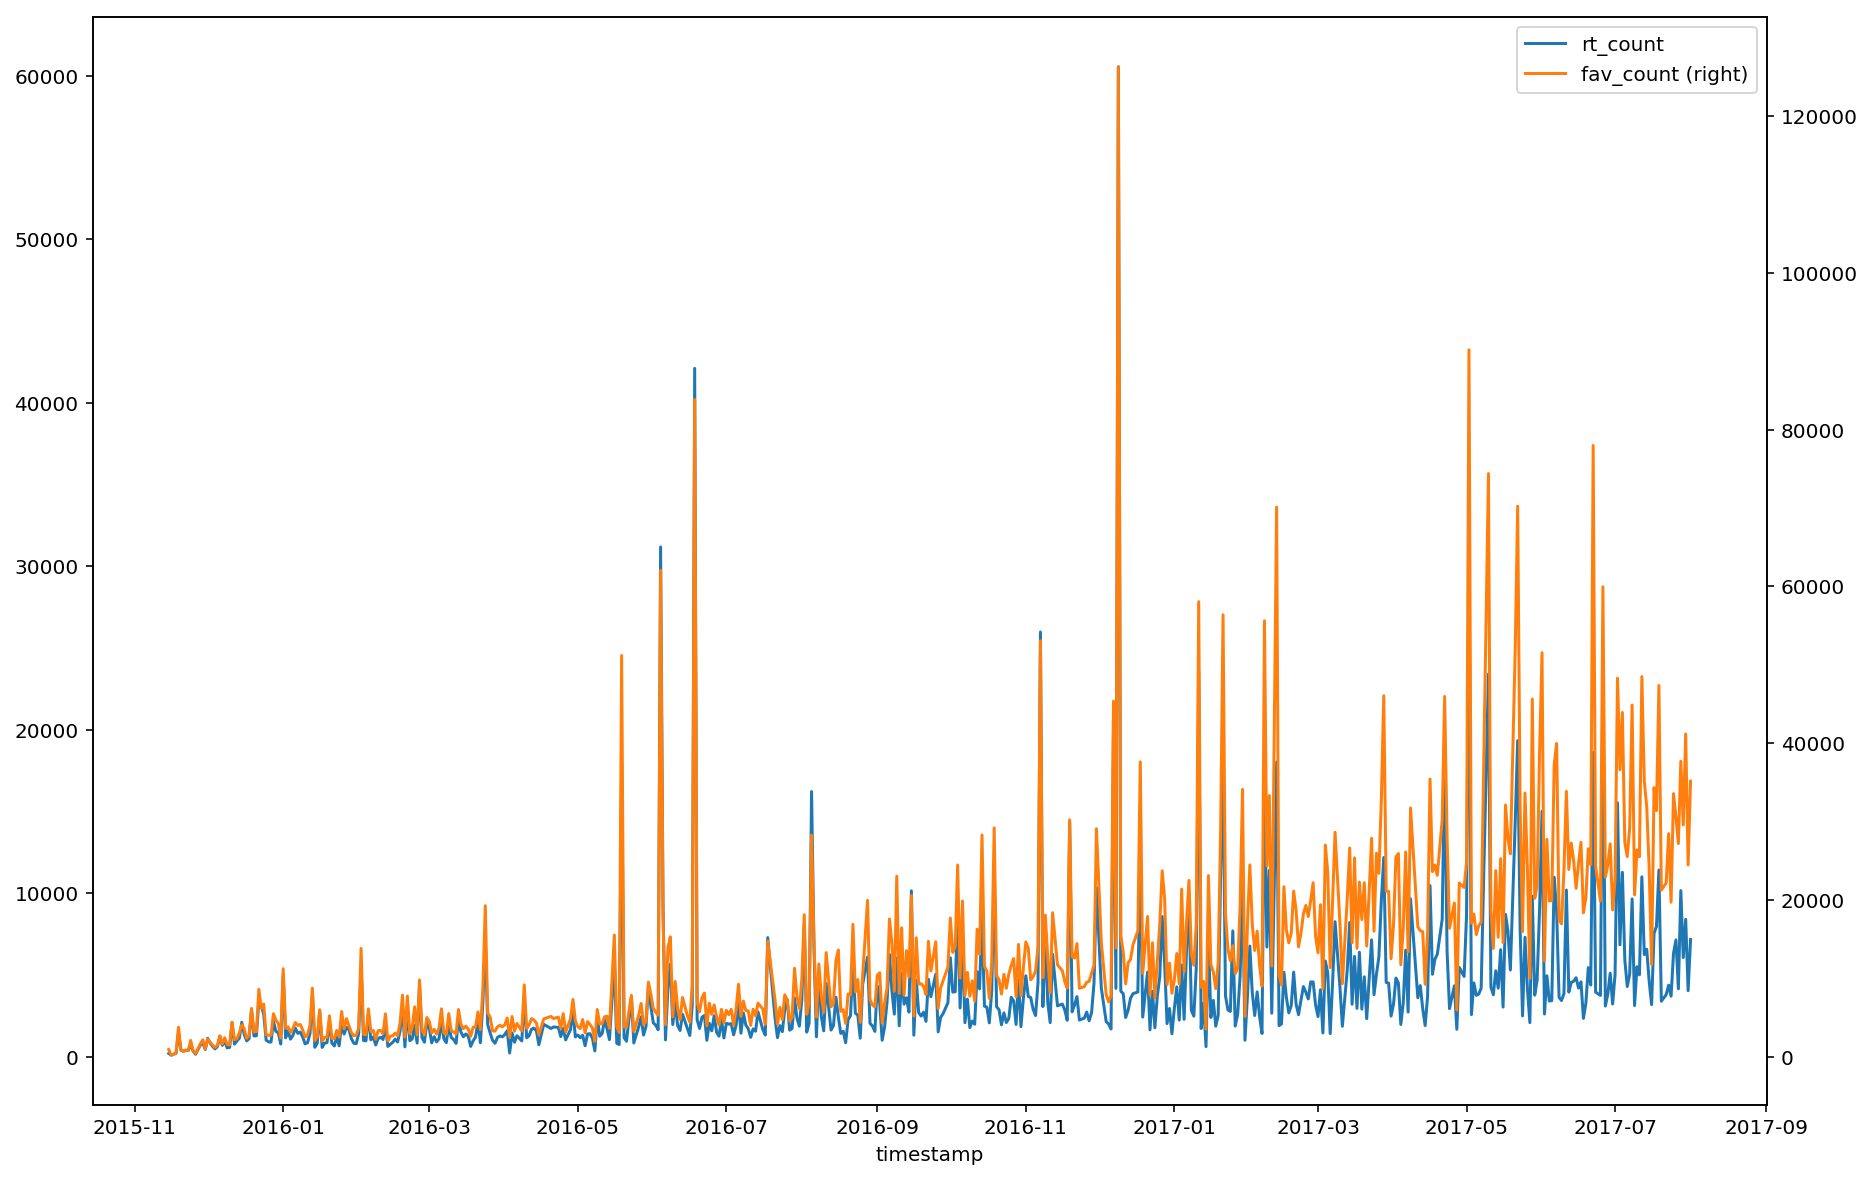

In [31]:
rt_fav_count_by_day = master_df.groupby([master_df['timestamp'].dt.date])[['rt_count', 'fav_count']].mean()

rt_fav_count_by_day.rt_count.plot(legend=True)

rt_fav_count_by_day.fav_count.plot(secondary_y=True, legend=True, figsize=(15,10));


In [32]:
rt_fav_count_by_day = rt_fav_count_by_day.rolling(window=30)
rt_fav_count_by_day

Rolling [window=30,center=False,axis=0]

We can see from the above graph that the popularity increased greatly in from 2015 to 2017/8. We measure this with the mean favs and retweets count. We can also appreciate some spikes in both fav and RT count as some tweets may be extremly popular and have increased fav and RT count.

Let's now look at what breeds appears more frequently in the pictures of the tweets.

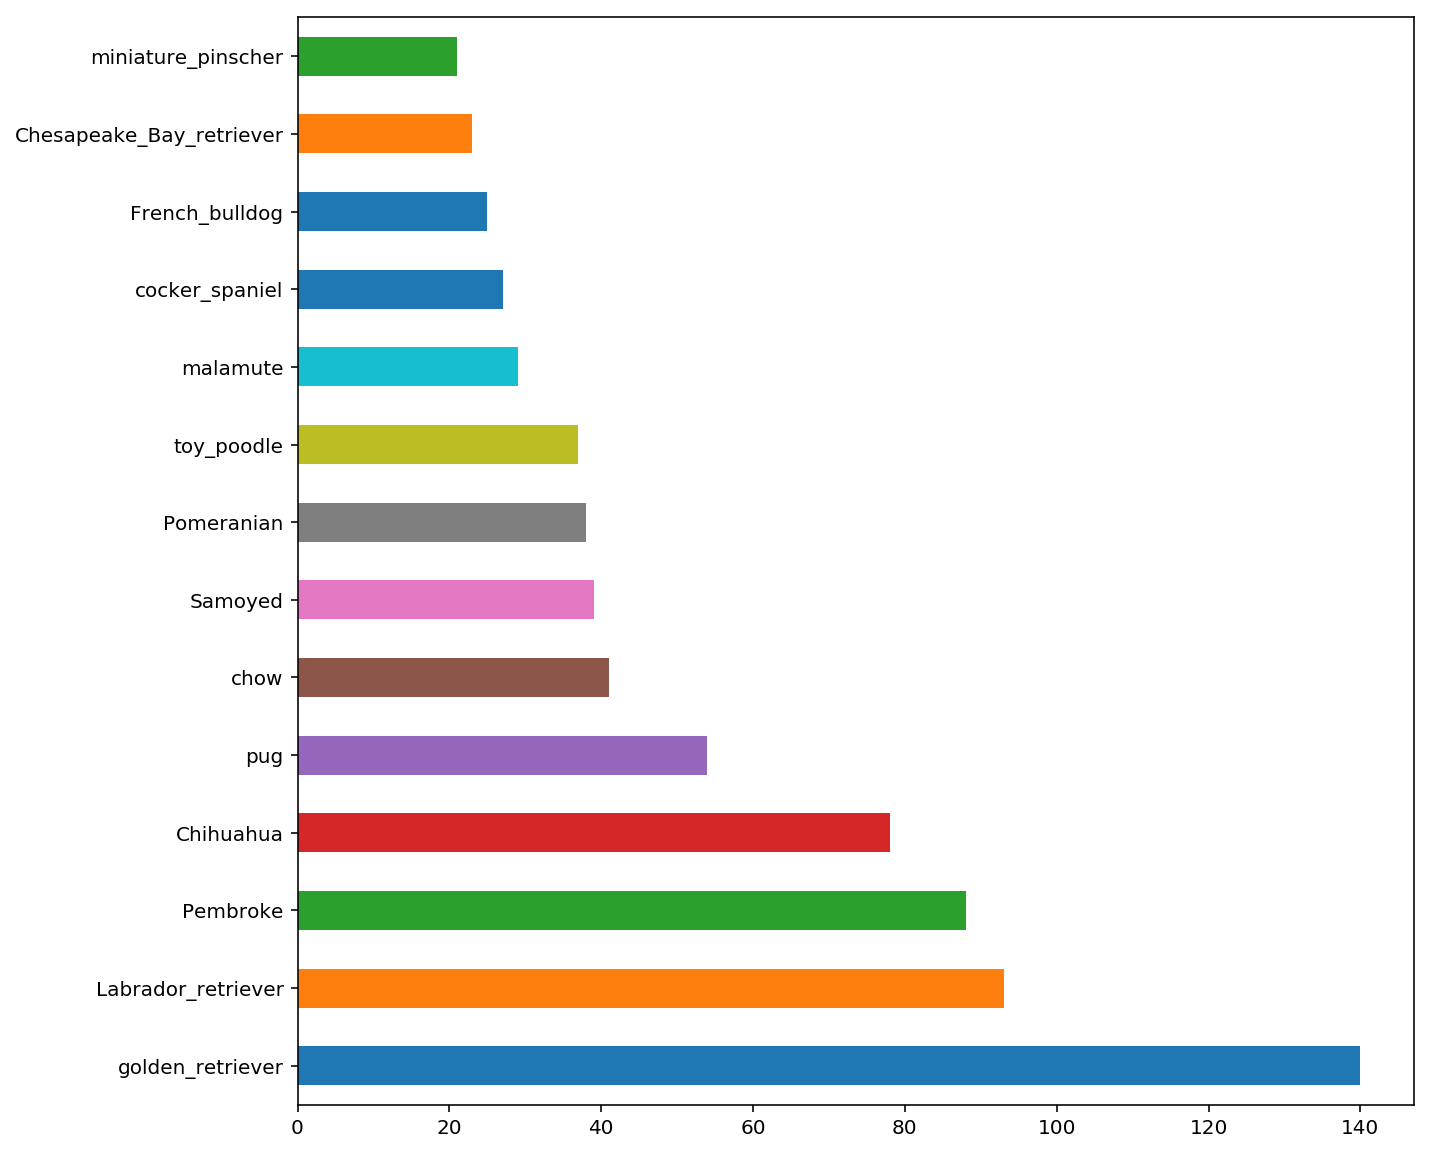

In [156]:
dogtype = master_df['p1'].value_counts()
dogtype = dogtype[dogtype>20]

dogtype.plot(kind='barh', figsize=(10,10));

We can see that the one that appears the most is the golden retriever, followed by the labrador retriever and then the Pembroke.

Let's now analyze the favs and RT count for the dog stages to see which one people likes the most

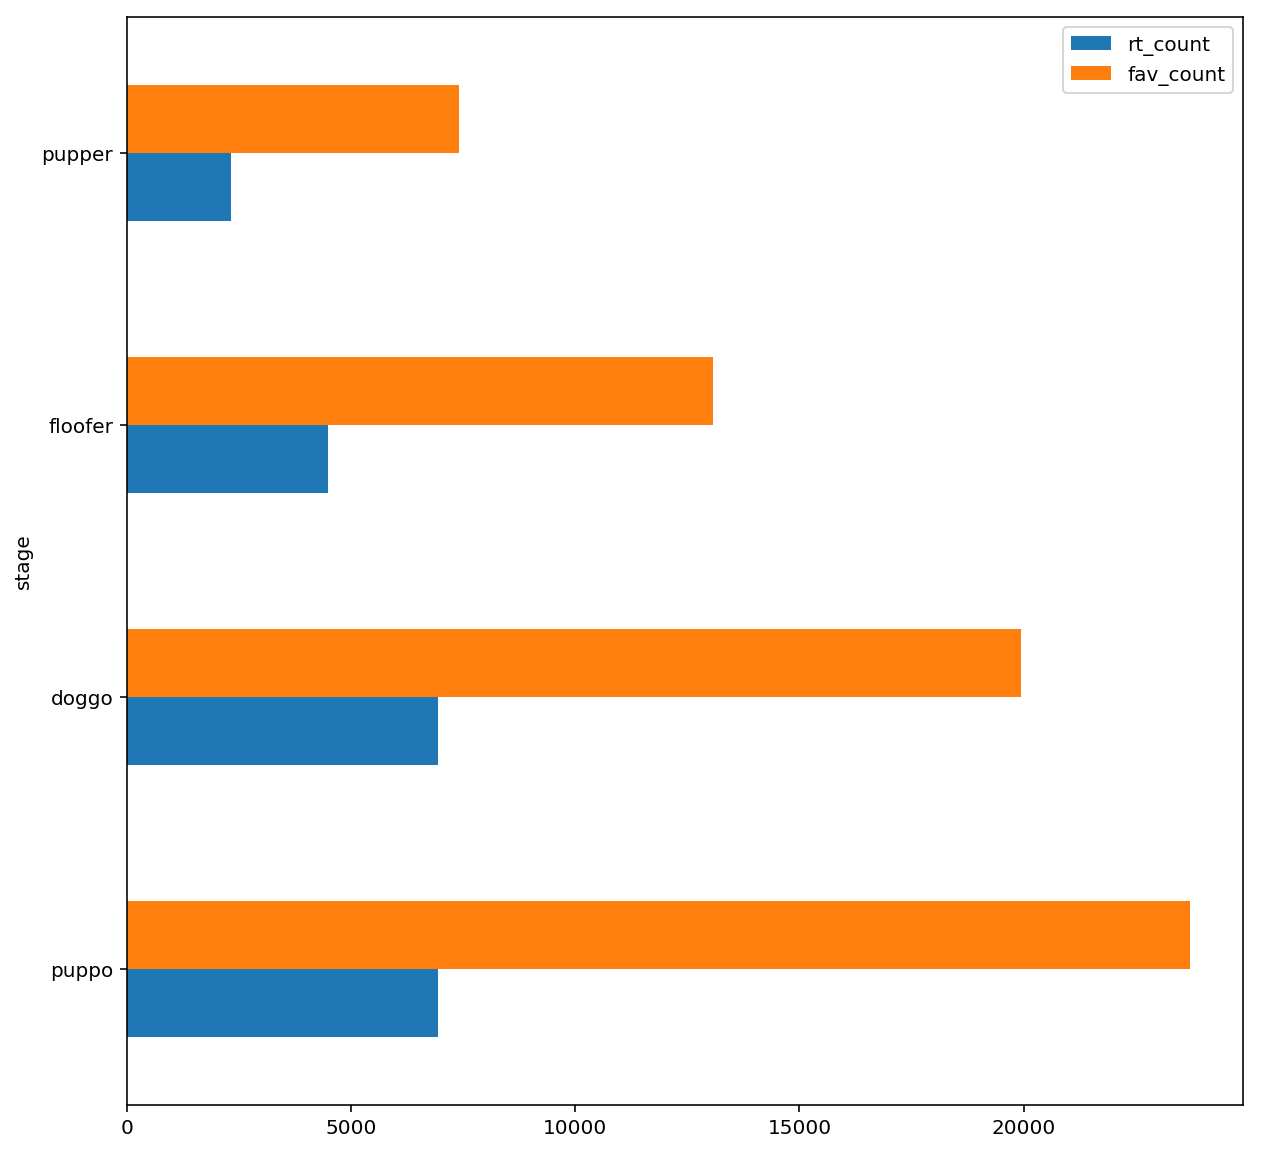

In [27]:
fav_rt_by_breed = master_df[master_df['stage']!='None'].groupby([master_df['stage']])[['rt_count', 'fav_count']].mean()
fav_rt_by_breed.sort_values(['fav_count'], ascending=False).plot(kind='barh', figsize=(10,10));

We can see from the above graph that the stage people fav the most is the puppo stage, followed by the doggo stage. IT is interesting to note that although puppo stage has more favs, it has the equal amount of RTs that the doggo stage.